In [170]:
import importlib.util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
spec = importlib.util.spec_from_file_location("DataPreprocessing", "/home/admin1/PycharmProjects/Machine_learning_Python/Utility/DataPreprocessing.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
preprocess_obj = foo.DataPreprocessing()

Data PreProcessign object created successfully


In [172]:
dataframe = pd.read_csv('Data/weatherHistory.csv')

In [173]:
dataframe.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [174]:
dataframe = dataframe.drop(['Formatted Date', 'Summary', 'Precip Type', 'Loud Cover', 'Daily Summary'], axis=1)
dataframe.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [175]:
new_columns = {'Temperature (C)':'x1', 'Apparent Temperature (C)':'y', 'Humidity':'x2', 'Wind Speed (km/h)':'x3',
          'Wind Bearing (degrees)':'x4', 'Visibility (km)':'x5', 'Pressure (millibars)':'x6'}
dataframe.rename(columns=new_columns,inplace=True)
dataframe.head()

,x1,y,x2,x3,x4,x5,x6
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [176]:
dataframe.shape

(96453, 7)

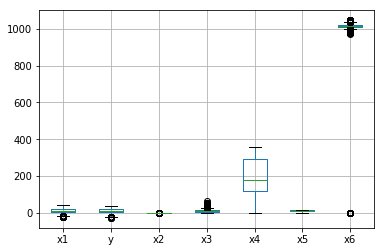

In [177]:
dataframe.boxplot()

In [186]:
dataframe = preprocess_obj.remove_outlier(dataframe)

In [187]:
dataframe.isna().sum()

x1     0
y      0
x2     0
x3    12
x4     0
x5     0
x6     0
dtype: int64

In [188]:
dataframe = dataframe.dropna()
dataframe = dataframe.reset_index(drop=True)

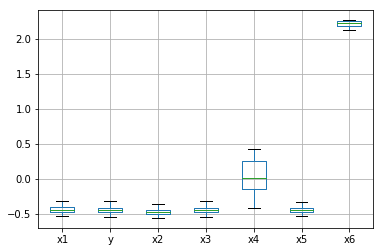

In [189]:
dataframe.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8482047b70>,
      dtype=object)

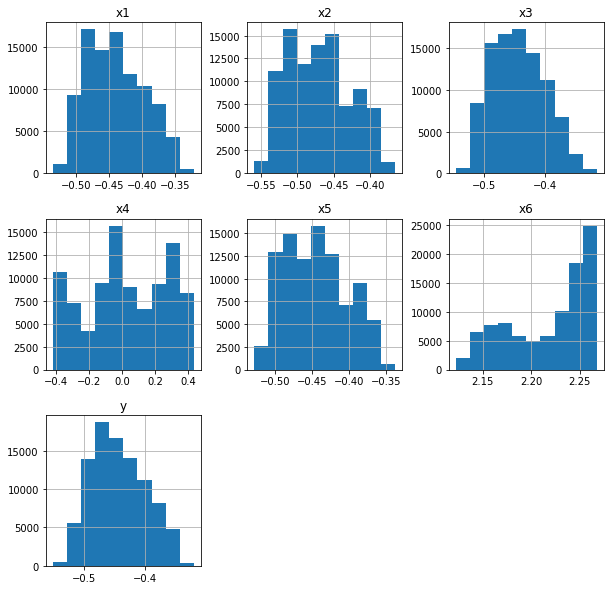

In [190]:
dataframe.hist(figsize=(10,10))

In [191]:
# Y = dataframe['y']
dataframe = preprocess_obj.standardize(dataframe)
# dataframe['y']=Y

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8481e18e80>,
      dtype=object)

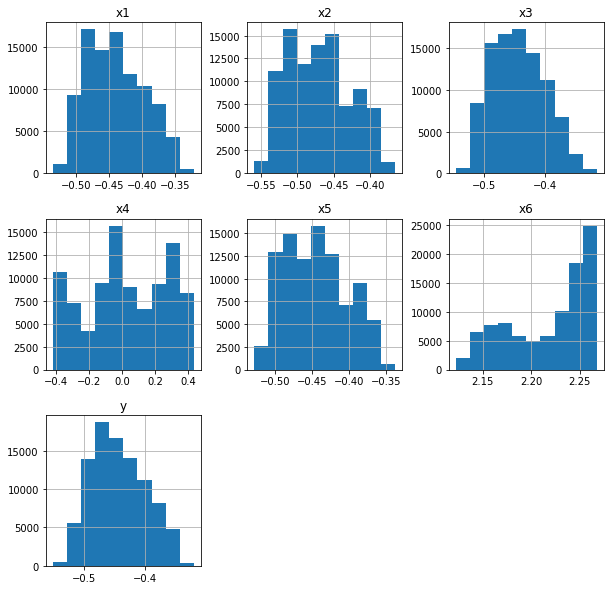

In [192]:
dataframe.hist(figsize=(10,10))

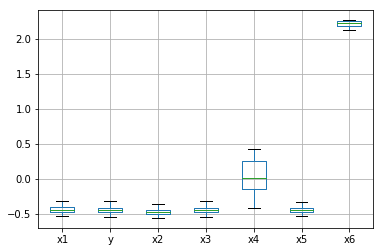

In [193]:
dataframe.boxplot()

In [194]:
dataframe.isnull().sum()

x1    0
y     0
x2    0
x3    0
x4    0
x5    0
x6    0
dtype: int64

In [195]:
dataframe,test_data = preprocess_obj.split(dataframe,500)

In [196]:
dataframe = dataframe.head(15000)

In [197]:
try:
    dataframe = dataframe.drop('index',axis=1).reset_index()
except Exception as e:
    pass

In [198]:
try:
    test_data = test_data.drop('index',axis=1).reset_index()
except Exception as e:
    pass

In [199]:
class Scothastic_Gradient:
    def __init__(self):
        self.learning_rate = 0.001
        self.iteration = 4
    def train(self,dataframe):
        dataframe.insert(loc=0, column='dummy', value=pd.Series(np.ones(dataframe.shape[0])))
        dataframe = dataframe[dataframe['y']!=0]
        dataframe = dataframe.reset_index()
        dataframe, Y = preprocess_obj.separate(dataframe,'y')
        weights = np.full((1,dataframe.shape[1]),1.0)
        print("weights:\n",weights.shape,"X head :\n",dataframe.head())
        for iterations in range(0,self.iteration):
            for counter in range(0,dataframe.shape[0]):
                X = dataframe.loc[counter,:]
                X = np.array(X).reshape(1,dataframe.shape[1])
                y = Y[counter]
                Ypred = np.matmul(weights,X.T)
                diff = np.array(Ypred-y).reshape(1,1)
                cost = (np.power(diff,2))/2
                if(diff==np.nan or diff == -1*np.inf or cost == np.nan or cost == np.inf): 
                    print("pred {},\n Y orig {},\nweights: {},\nX: {},\ncounter {},iteration: {}"
                          .format(Ypred,y,weights,X,counter,iterations))
                    exit()
                dw = np.matmul(abs(diff),X)
                weights = np.subtract(weights,np.multiply(dw,self.learning_rate))
            print(cost)
        return weights
    
    def test(self,test_data,weights):
        test_data.insert(loc=0, column='dummy', value=pd.Series(np.ones(test_data.shape[0])))
        test_data = test_data[test_data['y'] != 0]
        test_data = test_data.reset_index()
        test_data,Y =preprocess_obj.separate(test_data,'y')
        Y = np.array(Y).reshape(Y.shape[0],1)
#         Ypred = np.matmul(weights,test_data.T)
#         error = np.divide(np.abs(np.subtract(Ypred,Y)),Y)
#         error = np.divide(np.sum(error),test_data.shape[0])
#         print ((1-error)*100)
        Ypred = np.matmul(test_data,weights.T)
        error = np.divide(np.abs(np.subtract(Ypred,Y)),Y)
        error = np.divide(np.abs(np.sum(error)),test_data.shape[0])
        print("error :",error,"Accuracy = ",(1-error)*100)
        
    def main(self,dataframe,test_data):
        weights = self.train(dataframe)
        print(weigths)
        self.test(test_data,weights)

In [200]:
stochastic_object = Scothastic_Gradient()
stochastic_object.main(dataframe,test_data)

weights:
 (1, 7) X head :
    dummy        x1        x2        x3        x4        x5        x6
0    1.0 -0.474196 -0.497031 -0.461830  0.168455 -0.457289  2.201630
1    1.0 -0.477125 -0.499704 -0.464078  0.186357 -0.459928  2.197258
2    1.0 -0.453292 -0.475871 -0.467788  0.064424 -0.438451  2.224271
3    1.0 -0.482039 -0.501819 -0.466618  0.209350 -0.462050  2.191432
4    1.0 -0.476682 -0.497710 -0.470609  0.187259 -0.457922  2.197062
[[1.92242734e+80]]
[[6.44885892e+167]]
[[2.16329536e+255]]


/home/admin1/Downloads/enter/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in power


pred [[-1.34404992e+154]],
 Y orig -0.35558597673409453,
weights: [[-2.00232100e+153  8.68001138e+152  9.36302598e+152  8.91234022e+152
   6.93414246e+150  8.76798225e+152 -4.44863405e+153]],
X: [[ 1.         -0.35558598 -0.4025313  -0.37413462 -0.40342919 -0.37609042
   2.26735748]],
counter 9020,iteration: 3
pred [[-1.34691542e+154]],
 Y orig -0.4784420159002867,
weights: [[-2.01576150e+153  8.72780391e+152  9.41712820e+152  8.96262578e+152
   1.23564321e+151  8.81853068e+152 -4.47910847e+153]],
X: [[ 1.         -0.47844202 -0.52788017 -0.50791582  0.34157685 -0.50219179
   2.15329496]],
counter 9021,iteration: 3
pred [[-1.34921263e+154]],
 Y orig -0.49204574767087117,
weights: [[-2.02923065e+153  8.79224600e+152  9.48822919e+152  9.03103775e+152
   7.75568093e+150  8.88617167e+152 -4.50811153e+153]],
X: [[ 1.         -0.49204575 -0.53416034 -0.51003969  0.40448399 -0.5087649
   2.13257244]],
counter 9022,iteration: 3
pred [[-1.35816341e+154]],
 Y orig -0.49357377991131496,
weights: 

NameError: name 'weigths' is not defined